<a href="https://colab.research.google.com/github/Carlosrbrj/DataValidation/blob/main/An%C3%A1lise_de_vendas_DAJU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória - BIUD




Esse notebook tem como objetivo criar validar os dados dos clientes antes de subir na plataforma. Para, isso dividi essa análise em três partes, que também forma 3 datasets. Aqui, iremos iniciar análise a partir dos dados de vendas.

Sendo assim, o código abaixo importar todos os pacotes que poderemos usar nessa análise.

In [7]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

Agora, vamos importar a biblioteca que permite importar um dataset a partir do caminho do arquivo.

In [8]:
# Esse é o link que será o caminho público do arquivo que montamos.
link_csv = '/content/Vendas Daju - anlt.csv'

In [11]:
# Lê o arquivo
dataset = pd.read_csv(link_csv)

# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,id,date,customer_id,total_value,nfe,business_id
0,90169414,2024-05-12 09:27:20.000,6702325.0,23.70,41240576917624001454550010000032001145139502,4141.0
1,90128062,2024-05-11 08:45:35.000,10517689.0,20.00,24658,4141.0
2,90128064,2024-05-10 10:47:56.000,10517691.0,9000.00,24586,4141.0
3,90128063,2024-05-10 08:26:19.000,10517690.0,12000.00,24580,4141.0
4,90080954,2024-05-09 10:51:37.000,10509596.0,149.90,41240576917624000300550010001861491156929967,4141.0
5,90080951,2024-05-08 17:02:39.000,10509595.0,99.90,41240576917624000300550010001861361490210691,4141.0
6,90080953,2024-05-08 13:59:33.000,5982027.0,239.40,41240576917624000725550010000498461157216384,4141.0
7,89831126,2024-04-30 13:16:03.000,8053790.0,89.64,41240476917624000725550010000497091111982804,4141.0
8,89831125,2024-04-30 10:04:28.000,10469796.0,47.40,41240476917624001454550010000031481147060592,4141.0
9,89765342,2024-04-26 15:27:59.000,8011342.0,10.00,23738,4141.0


## 1. Análise descritivas

Uma vez carregado o dataset, vamos começar as análises do dataset identificando o seu tamanho, e as informações inciais.

In [12]:
# Mostra as dimensões do dataset
dataset.shape

(203296, 6)

Nesse dataset, temos vendas do dia 28/09/2022 à 12/05/2024. Ao todo, são 892.405 vendas.

In [13]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203296 entries, 0 to 203295
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           203296 non-null  int64  
 1   date         203295 non-null  object 
 2   customer_id  126012 non-null  float64
 3   total_value  203295 non-null  float64
 4   nfe          203295 non-null  object 
 5   business_id  203295 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.3+ MB


Inicialmente, podemos observar que existem 892.405 entradas e 6 atributos. Além disso, podemos identifcar que nenhum atributo tem valores nulos, excetos as vendas sem o CPF na nota, portanto, sem client_id. Ao total, são 359.875 vendas SEM cpf. Logo,cerca de 60% das vendas possuem CPF.

In [14]:
# Verifica a distribuição de vendas unidade
dataset.groupby('business_id').size()

business_id
3939.0     2022
4036.0    38057
4037.0    31366
4038.0    32302
4039.0    32715
4040.0    18730
4041.0    19359
4042.0    12257
4043.0    14857
4141.0     1630
dtype: int64

Com essa análise, podemos observar que a unidade que mais tem vendas é 4038. De outro modo, a unidade 4141 é a que tem menor movimentação.

O código abaixo exibe as estatísticas descritivas do dataset de vendas.

In [15]:
# Obtendo as estatísticas descritivas
dataset.describe()

,id,customer_id,total_value,business_id
count,2.032960e+05,1.260120e+05,203295.000000,203295.000000
mean,7.094874e+07,7.097225e+06,283.778054,4038.549925
std,4.942312e+06,1.118505e+06,377.649571,13.686629
min,6.493334e+06,5.900310e+06,0.970000,3939.000000
25%,6.657944e+07,5.996306e+06,79.900000,4037.000000
50%,6.810044e+07,6.482454e+06,169.250000,4038.000000
75%,7.622294e+07,8.049460e+06,349.470000,4040.000000
max,9.016941e+07,1.051769e+07,32550.000000,4141.000000


A partir dessa análise, podemos observar que o ticket médio por venda é de 272,72 reais por venda. Além disso, a venda com maior valor total é de mais de R$42 mil reais. Além disso, não existem vendas com valor negativo, nem zerado.

Agora, vamos exibir o gráfico boxplot para entender como está distribuído o atributo Total_valeu, com o objetivo de identificar se existe alguma venda com valor negativo.

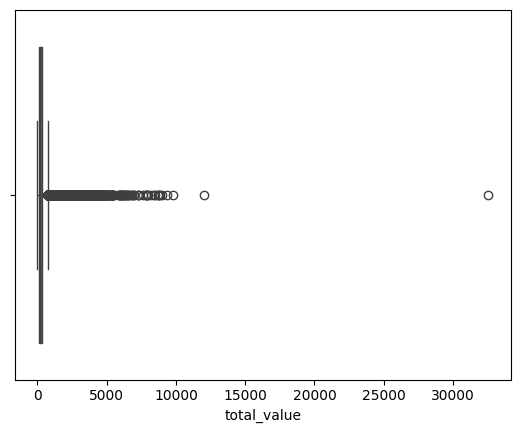

In [16]:
# boxplot com seaborn de Total_valeu
sns.boxplot(x=dataset['total_value']);

O gráfico acima indica que existem alguns problemas com o atributo 'total_valeu'. Nele, podemos identificar que não existem vendas negativas e algumas vendas com o valor que se destaca - acima de 3 desvios padrão. Agora, vamos verificar os nulls do dataset original.

In [17]:
# verificando nulls no dataset
dataset.isnull().sum()

id                 0
date               1
customer_id    77284
total_value        1
nfe                1
business_id        1
dtype: int64

Aqui, podemos observar que existem 359.875 compras sem CPF na nota, ou seja, sem estarem vinculadas à customer_id.

Antes de darmos início ao tratamento de dados, iremos criar um novo dataset para resguardar o orginal. Além disso, no novo dataset, vamos trocar todos os valores zero por Na.

<Axes: >

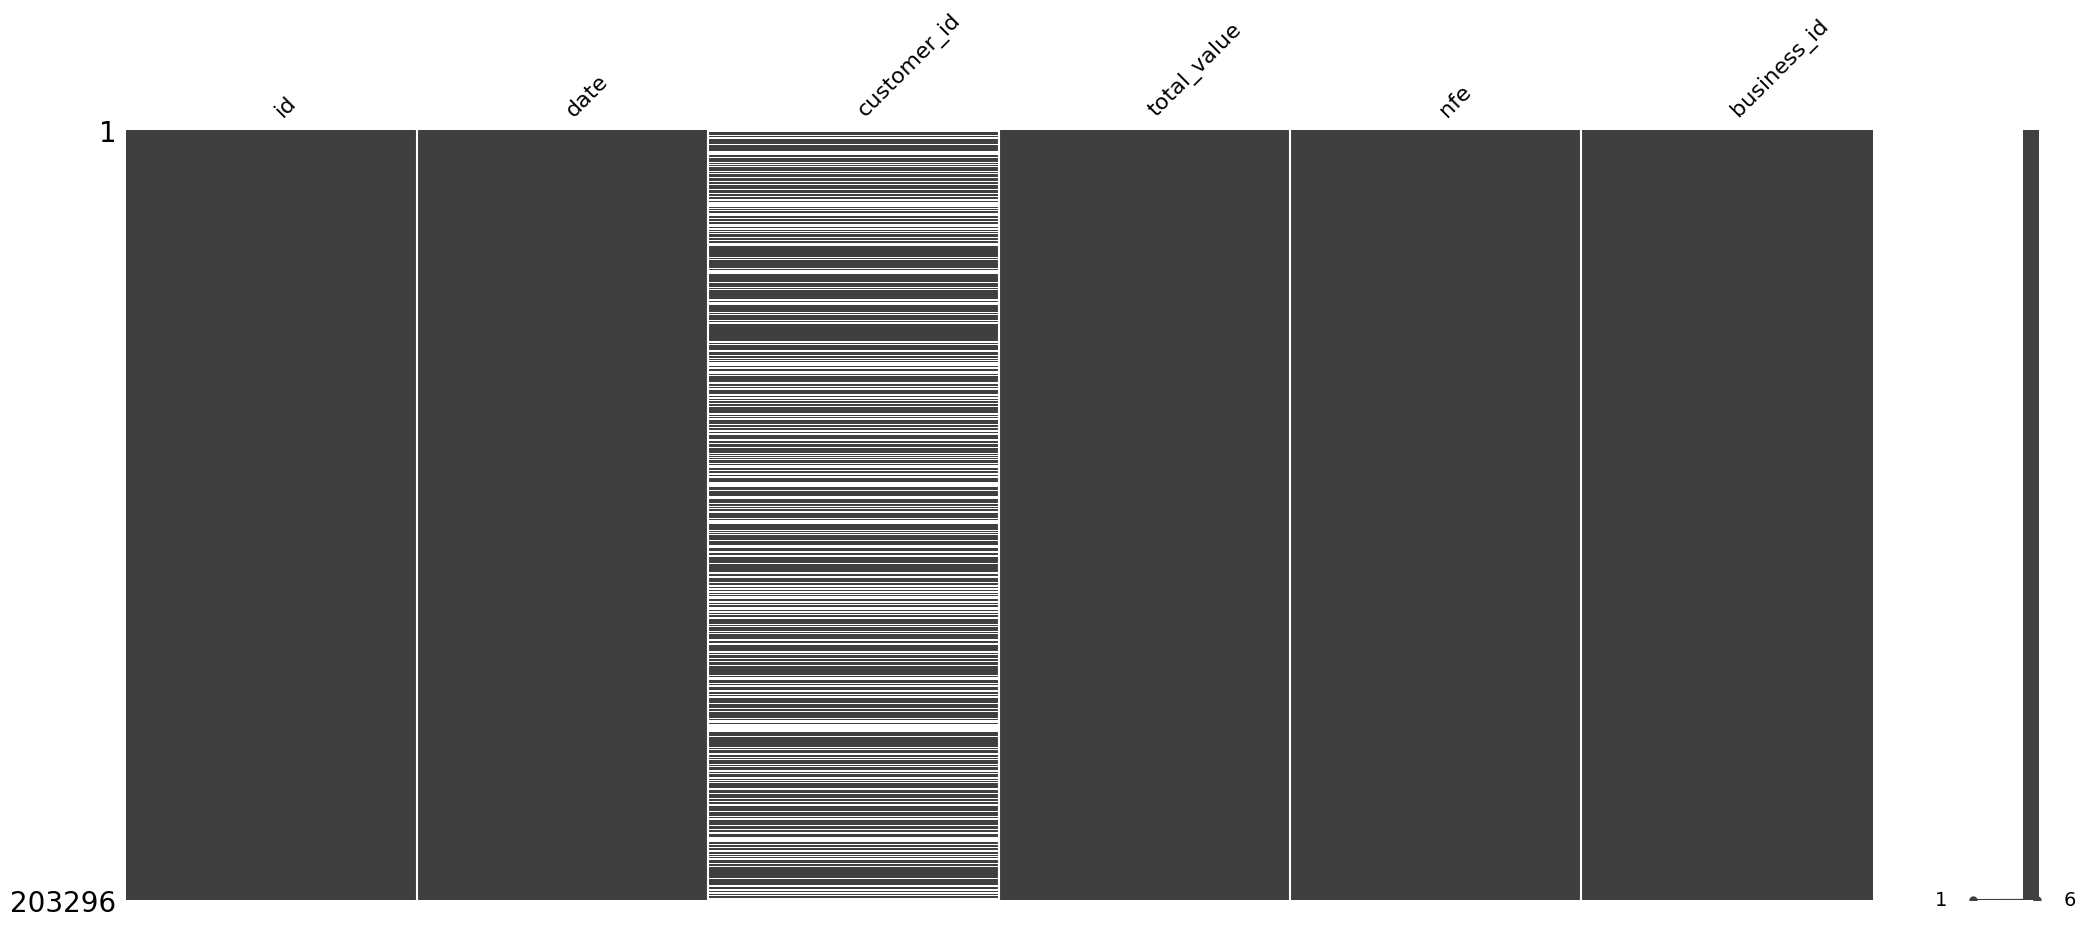

In [18]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
crek = dataset[col[:]]

# substituindo os zeros por NaN
crek.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(crek)

In [19]:
# verificando nulls no dataset
crek.isnull().sum()

id                 0
date               1
customer_id    77284
total_value        1
nfe                1
business_id        1
dtype: int64

Com esse novo dataset, vamos verificar como se comportam as novas estatísticas descritvas.

In [20]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
crek.describe()

,id,customer_id,total_value,business_id
count,2.032960e+05,1.260120e+05,203295.000000,203295.000000
mean,7.094874e+07,7.097225e+06,283.778054,4038.549925
std,4.942312e+06,1.118505e+06,377.649571,13.686629
min,6.493334e+06,5.900310e+06,0.970000,3939.000000
25%,6.657944e+07,5.996306e+06,79.900000,4037.000000
50%,6.810044e+07,6.482454e+06,169.250000,4038.000000
75%,7.622294e+07,8.049460e+06,349.470000,4040.000000
max,9.016941e+07,1.051769e+07,32550.000000,4141.000000


## 1.2 Visualizações Unimodais

Agora, vamos anáise visualmente como estão distribuídos esse dataset olhando para os atributos Id e Total_valeu.

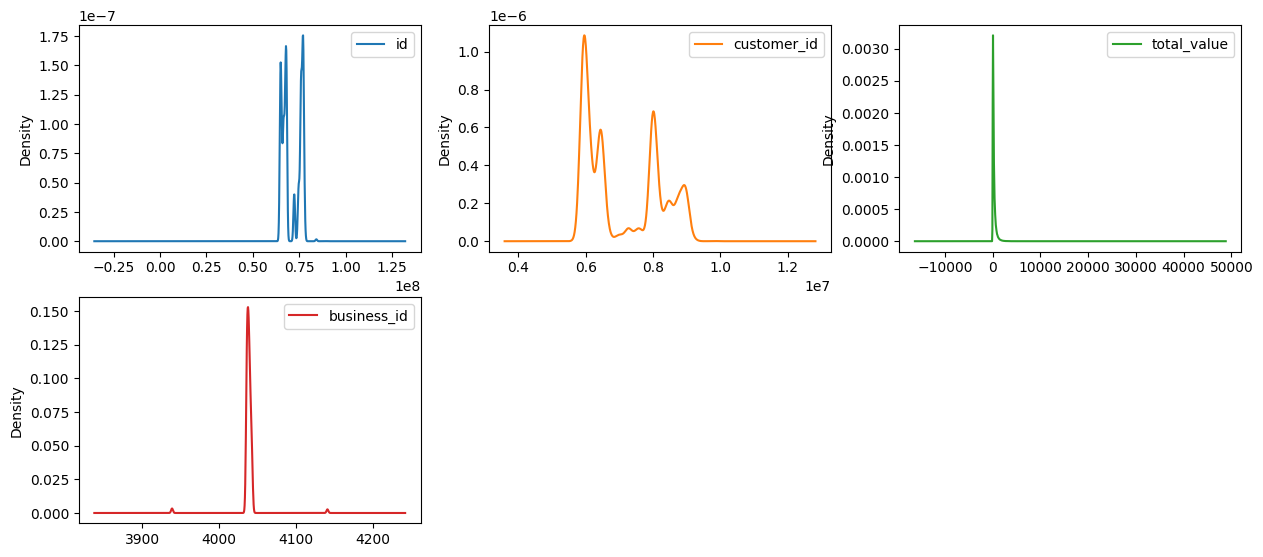

In [21]:
# Density Plot
crek.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

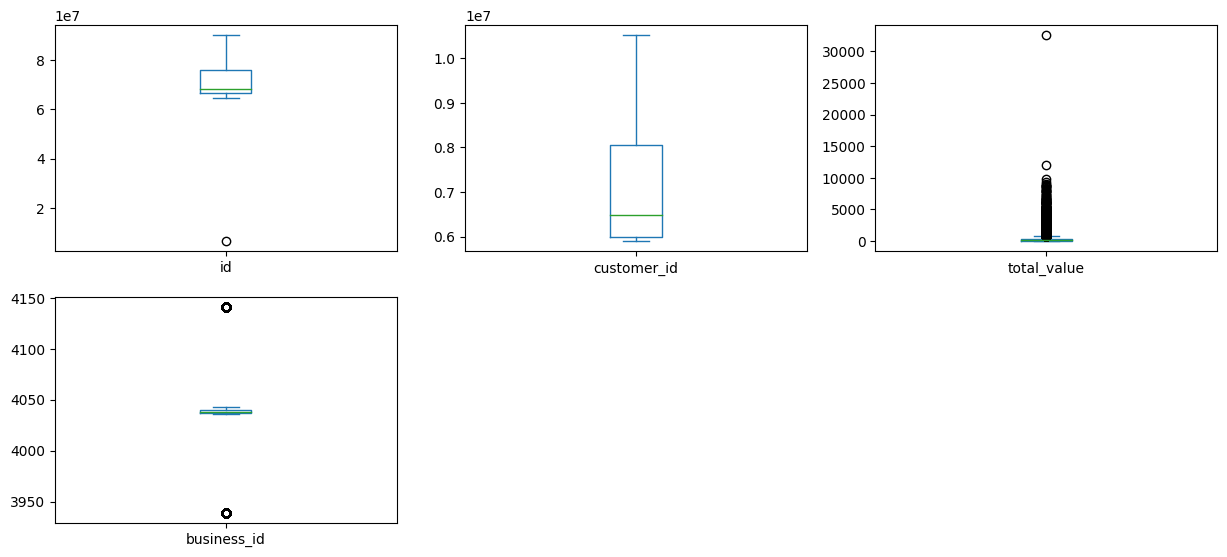

In [22]:
# Boxplot
crek.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

# Visualização histórica de dados

Nessa seção, o nosso objetivo é identificar se existe algum período em que a evolução do total_valeu (valor total nas vendas) tem algum período que se destaca.
Para isso, iremos usar a biblioteca do Seaborn.

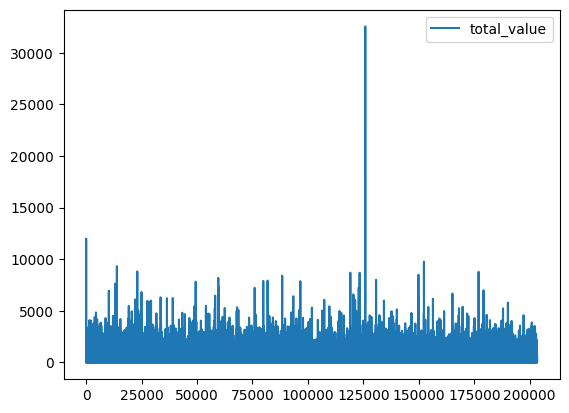

In [23]:
# gráfico de linhas com Seaborn
sns.lineplot(data=dataset.drop(['id','customer_id','business_id'], axis=1));

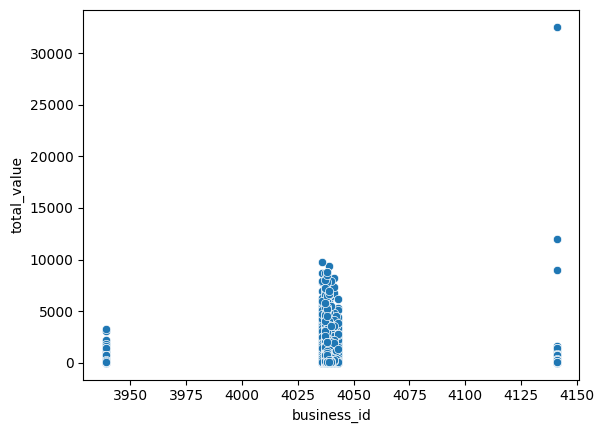

In [24]:
# scatter plot com Seaborn
sns.scatterplot(x='business_id', y='total_value', data=dataset);

A partir dos gráficos acima, podemos observar que existem venda com valor acima do normal esperado, indicando haver problemas de outlier.

Criando uma visualização de série temporal usando a biblioteca seaborn.

O bloco de código abaixo prepara os dados do dataset para isso.

In [25]:
# Converter a coluna 'date' para o formato datetime

dataset['date'] = pd.to_datetime(dataset['date'])


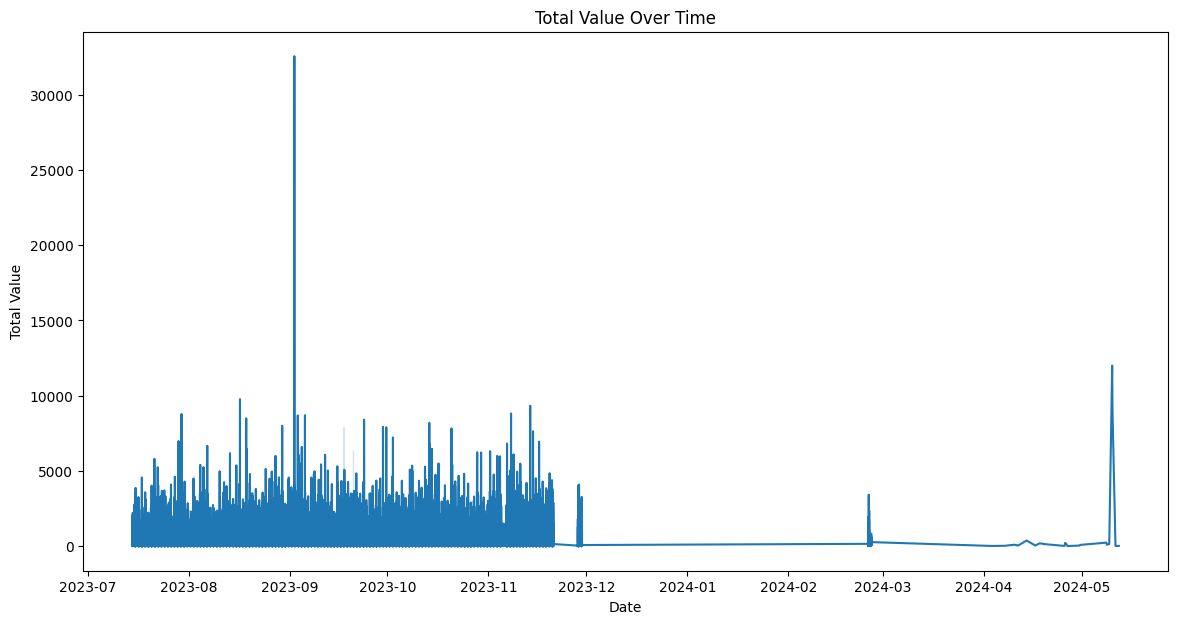

In [26]:
# Criar o gráfico de série temporal
plt.figure(figsize=(14, 7))
sns.lineplot(data=dataset, x='date', y='total_value')

# Adicionar títulos e rótulos aos eixos
plt.title('Total Value Over Time')
plt.xlabel('Date')
plt.ylabel('Total Value')

# Mostrar o gráfico
plt.show()